<a href="https://colab.research.google.com/github/sid0312/10DaysMLChallenge/blob/master/Feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix
train_ds=pd.read_csv('/content/drive/My Drive/train.csv')

In [3]:
train_ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
data=train_ds.drop(columns=['Ticket'])

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [6]:
import collections
check=list(data['Cabin'])
counter=collections.Counter(check)
print(counter)


Counter({nan: 687, 'G6': 4, 'C23 C25 C27': 4, 'B96 B98': 4, 'F33': 3, 'E101': 3, 'F2': 3, 'D': 3, 'C22 C26': 3, 'C123': 2, 'D33': 2, 'C52': 2, 'B28': 2, 'C83': 2, 'F G73': 2, 'D26': 2, 'B58 B60': 2, 'C2': 2, 'E33': 2, 'F4': 2, 'D36': 2, 'C93': 2, 'C78': 2, 'D35': 2, 'B77': 2, 'E67': 2, 'C125': 2, 'B49': 2, 'C65': 2, 'B57 B59 B63 B66': 2, 'B18': 2, 'C124': 2, 'B35': 2, 'E44': 2, 'C92': 2, 'D20': 2, 'E25': 2, 'B22': 2, 'C68': 2, 'C126': 2, 'B51 B53 B55': 2, 'B5': 2, 'B20': 2, 'E24': 2, 'E8': 2, 'E121': 2, 'D17': 2, 'C85': 1, 'E46': 1, 'C103': 1, 'D56': 1, 'A6': 1, 'B78': 1, 'B30': 1, 'E31': 1, 'A5': 1, 'D10 D12': 1, 'C110': 1, 'F E69': 1, 'D47': 1, 'B86': 1, 'B19': 1, 'A7': 1, 'C49': 1, 'A32': 1, 'B4': 1, 'B80': 1, 'A31': 1, 'D15': 1, 'C87': 1, 'B94': 1, 'C99': 1, 'C118': 1, 'D7': 1, 'A19': 1, 'C106': 1, 'E36': 1, 'C54': 1, 'C7': 1, 'E34': 1, 'C32': 1, 'C91': 1, 'E40': 1, 'T': 1, 'C128': 1, 'D37': 1, 'E50': 1, 'C82': 1, 'E10': 1, 'A34': 1, 'C104': 1, 'C111': 1, 'E38': 1, 'D21': 1, 'E12':

In [0]:
data.drop(columns=['Cabin'],inplace=True)

In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [9]:
import collections
check=list(data['Embarked'])
counter=collections.Counter(check)
print(counter)


Counter({'S': 644, 'C': 168, 'Q': 77, nan: 2})


In [0]:
data['Embarked'] = data['Embarked'].fillna('S')

In [11]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [0]:
import pandas as pd
import numpy as np
import copy

In [13]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB
None


In [0]:
data['Age'] = data['Age'].fillna(int(data['Age'].mean()))

In [15]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB
None


In [0]:
data.drop(columns=['Name'],inplace=True)

In [17]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [0]:
cat_data=data.select_dtypes(include=['object']).copy()

In [19]:
cat_data.head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [20]:
print(cat_data['Embarked'].value_counts())

S    646
C    168
Q     77
Name: Embarked, dtype: int64


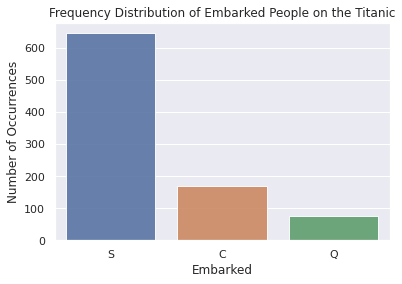

In [21]:
carrier_count = cat_data['Embarked'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Embarked People on the Titanic')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Embarked', fontsize=12)
plt.show()

In [0]:
cat_data_one_hot = cat_data.copy()

In [0]:
cat_data_one_hot = pd.get_dummies(cat_data_one_hot,columns=['Embarked'],prefix=['Embarked'])

In [24]:
cat_data_one_hot.head(10)

,Sex,Embarked_C,Embarked_Q,Embarked_S
0,male,0,0,1
1,female,1,0,0
2,female,0,0,1
3,female,0,0,1
4,male,0,0,1
5,male,0,1,0
6,male,0,0,1
7,male,0,0,1
8,female,0,0,1
9,female,1,0,0


Text(0.5, 0, 'Sex')

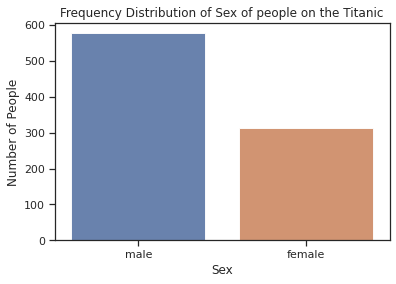

In [25]:
carrier_count = cat_data['Sex'].value_counts()
sns.set(style="ticks")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Sex of people on the Titanic')
plt.ylabel('Number of People', fontsize=12)
plt.xlabel('Sex', fontsize=12)

In [0]:
cat_data_one_hot = cat_data_one_hot.copy()

In [0]:
cat_data_one_hot = pd.get_dummies(cat_data_one_hot,columns=['Sex'],prefix=['Sex'])

In [28]:
cat_data_one_hot.head(10)

,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,0,1,0,1
1,1,0,0,1,0
2,0,0,1,1,0
3,0,0,1,1,0
4,0,0,1,0,1
5,0,1,0,0,1
6,0,0,1,0,1
7,0,0,1,0,1
8,0,0,1,1,0
9,1,0,0,1,0


In [0]:
cat_data_one_hot['Siblings/Spouses']=data['SibSp']

In [0]:
cat_data_one_hot = pd.get_dummies(cat_data_one_hot,columns=['Siblings/Spouses'],prefix=['Siblings_Spouses'])

In [31]:
cat_data_one_hot.head(10)

,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Siblings_Spouses_0,Siblings_Spouses_1,Siblings_Spouses_2,Siblings_Spouses_3,Siblings_Spouses_4,Siblings_Spouses_5,Siblings_Spouses_8
0,0,0,1,0,1,0,1,0,0,0,0,0
1,1,0,0,1,0,0,1,0,0,0,0,0
2,0,0,1,1,0,1,0,0,0,0,0,0
3,0,0,1,1,0,0,1,0,0,0,0,0
4,0,0,1,0,1,1,0,0,0,0,0,0
5,0,1,0,0,1,1,0,0,0,0,0,0
6,0,0,1,0,1,1,0,0,0,0,0,0
7,0,0,1,0,1,0,0,0,1,0,0,0
8,0,0,1,1,0,1,0,0,0,0,0,0
9,1,0,0,1,0,0,1,0,0,0,0,0


In [0]:
cat_data_one_hot['Parents/Children']=data['Parch']

In [0]:
cat_data_one_hot = pd.get_dummies(cat_data_one_hot,columns=['Parents/Children'],prefix=['Parents/Children'])

In [34]:
cat_data_one_hot.head(10)

,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Siblings_Spouses_0,Siblings_Spouses_1,Siblings_Spouses_2,Siblings_Spouses_3,Siblings_Spouses_4,Siblings_Spouses_5,Siblings_Spouses_8,Parents/Children_0,Parents/Children_1,Parents/Children_2,Parents/Children_3,Parents/Children_4,Parents/Children_5,Parents/Children_6
0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
5,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
6,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
7,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
8,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
9,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [0]:
age_buckets=pd.DataFrame(columns=['Age','group'])

In [0]:
age_buckets['Age']=data['Age']

In [37]:
age_buckets.head(10)

,Age,group
0,22.0,NaN
1,38.0,NaN
2,26.0,NaN
3,35.0,NaN
4,35.0,NaN
5,29.0,NaN
6,54.0,NaN
7,2.0,NaN
8,27.0,NaN
9,14.0,NaN


In [0]:
age_labels = ['Infant', 'Toodler', 'Kid', 'Pre-teen','Teen','Young Adult','Adult','Young Middle-Aged Adult','Middle-Aged','Pre-Senior Citizen','Senior Citizen']
age_groups = [0,2,5,8,13,17,20,22,40,50,60,70]
age_buckets['group'] = pd.cut(age_buckets['Age'], bins=age_groups, labels=age_labels)

In [39]:
age_buckets.head(10)

,Age,group
0,22.0,Adult
1,38.0,Young Middle-Aged Adult
2,26.0,Young Middle-Aged Adult
3,35.0,Young Middle-Aged Adult
4,35.0,Young Middle-Aged Adult
5,29.0,Young Middle-Aged Adult
6,54.0,Pre-Senior Citizen
7,2.0,Infant
8,27.0,Young Middle-Aged Adult
9,14.0,Teen


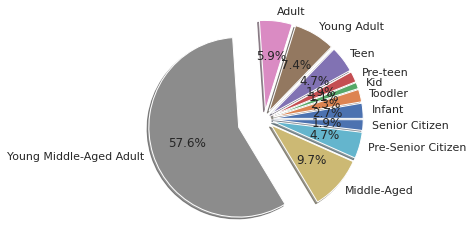

In [40]:
labels = age_buckets['group'].astype('category').cat.categories.tolist()
counts = age_buckets['group'].value_counts()
sizes = [counts[label] for label in labels]
fig1, ax1 = plt.subplots()
explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.3,0.1,0.1,0.1]
ax1.pie(sizes, explode=explode,labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [0]:
data1=cat_data_one_hot.copy()


In [0]:
data1['Age Group']=age_buckets['group']
data['Age Group']=age_buckets['group']

In [0]:
data1 = pd.get_dummies(data1,columns=['Age Group'],prefix=['Age Group'])

In [44]:
data1.head(10)

,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Siblings_Spouses_0,Siblings_Spouses_1,Siblings_Spouses_2,Siblings_Spouses_3,Siblings_Spouses_4,Siblings_Spouses_5,Siblings_Spouses_8,Parents/Children_0,Parents/Children_1,Parents/Children_2,Parents/Children_3,Parents/Children_4,Parents/Children_5,Parents/Children_6,Age Group_Infant,Age Group_Toodler,Age Group_Kid,Age Group_Pre-teen,Age Group_Teen,Age Group_Young Adult,Age Group_Adult,Age Group_Young Middle-Aged Adult,Age Group_Middle-Aged,Age Group_Pre-Senior Citizen,Age Group_Senior Citizen
0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [45]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age Group
0,1,0,3,male,22.0,1,0,7.2500,S,Adult
1,2,1,1,female,38.0,1,0,71.2833,C,Young Middle-Aged Adult
2,3,1,3,female,26.0,0,0,7.9250,S,Young Middle-Aged Adult
3,4,1,1,female,35.0,1,0,53.1000,S,Young Middle-Aged Adult
4,5,0,3,male,35.0,0,0,8.0500,S,Young Middle-Aged Adult


In [0]:
data1['Fare']=data['Fare']

In [47]:
data1.head()

,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Siblings_Spouses_0,Siblings_Spouses_1,Siblings_Spouses_2,Siblings_Spouses_3,Siblings_Spouses_4,Siblings_Spouses_5,Siblings_Spouses_8,Parents/Children_0,Parents/Children_1,Parents/Children_2,Parents/Children_3,Parents/Children_4,Parents/Children_5,Parents/Children_6,Age Group_Infant,Age Group_Toodler,Age Group_Kid,Age Group_Pre-teen,Age Group_Teen,Age Group_Young Adult,Age Group_Adult,Age Group_Young Middle-Aged Adult,Age Group_Middle-Aged,Age Group_Pre-Senior Citizen,Age Group_Senior Citizen,Fare
0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,7.2500
1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,71.2833
2,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,7.9250
3,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,53.1000
4,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,8.0500


In [0]:
def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0: 
       return v
    return v / norm

In [0]:
a=normalize(data1['Fare'])

In [0]:
data1['Fare']=a

In [51]:
data1.head()

,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Siblings_Spouses_0,Siblings_Spouses_1,Siblings_Spouses_2,Siblings_Spouses_3,Siblings_Spouses_4,Siblings_Spouses_5,Siblings_Spouses_8,Parents/Children_0,Parents/Children_1,Parents/Children_2,Parents/Children_3,Parents/Children_4,Parents/Children_5,Parents/Children_6,Age Group_Infant,Age Group_Toodler,Age Group_Kid,Age Group_Pre-teen,Age Group_Teen,Age Group_Young Adult,Age Group_Adult,Age Group_Young Middle-Aged Adult,Age Group_Middle-Aged,Age Group_Pre-Senior Citizen,Age Group_Senior Citizen,Fare
0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.004103
1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.040344
2,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.004485
3,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.030053
4,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.004556


In [52]:
data1.head(10)

,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Siblings_Spouses_0,Siblings_Spouses_1,Siblings_Spouses_2,Siblings_Spouses_3,Siblings_Spouses_4,Siblings_Spouses_5,Siblings_Spouses_8,Parents/Children_0,Parents/Children_1,Parents/Children_2,Parents/Children_3,Parents/Children_4,Parents/Children_5,Parents/Children_6,Age Group_Infant,Age Group_Toodler,Age Group_Kid,Age Group_Pre-teen,Age Group_Teen,Age Group_Young Adult,Age Group_Adult,Age Group_Young Middle-Aged Adult,Age Group_Middle-Aged,Age Group_Pre-Senior Citizen,Age Group_Senior Citizen,Fare
0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.004103
1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.040344
2,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.004485
3,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.030053
4,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.004556
5,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.004787
6,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.029353
7,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.011928
8,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.006301
9,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.017019


In [0]:
X_train=data1[:700]
X_test=data1[701:]
y_train=data['Survived'][:700]
y_test=data['Survived'][701:]

In [54]:
!pip install pydotplus
import pydotplus

In [0]:
def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)

In [0]:
dt = DecisionTreeClassifier(criterion = 'entropy')

In [57]:
dt.fit(X_train.values, y_train.values)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
feature_names=list(data1.columns)

In [0]:
tree_graph_to_png(dt, feature_names=feature_names,png_file_to_save='dt.png')

In [60]:
yhat_test=dt.predict(X_test.values)
yhat_test

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0])

In [0]:
labels_test=y_test.values

In [62]:

acc=accuracy_score(labels_test,yhat_test)
labels_test

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [63]:
print("The test accuracy is {} %".format(acc*100))

The test accuracy is 78.42105263157895 %


In [0]:
class_names=list(data1.columns)

In [65]:
confusion_matrix(labels_test,yhat_test)

array([[100,  20],
       [ 21,  49]])

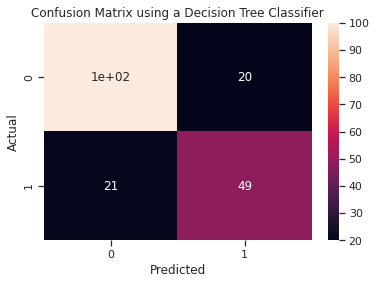

In [66]:
data = {'y_Actual':    labels_test,
        'y_Predicted': yhat_test
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix,annot=True)
plt.title('Confusion Matrix using a Decision Tree Classifier')
plt.show()

In [0]:
normalized_confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)

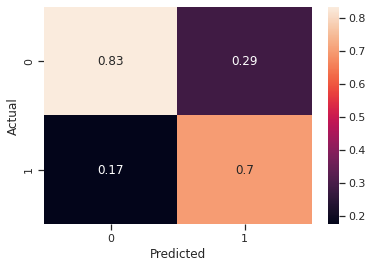

In [69]:
sns.heatmap(normalized_confusion_matrix,annot=True)
plt.show()